In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [53]:
# 1. Read the data.
data_up = pd.read_csv('up_data_mean.csv')  # Replace with your file name
temperature_up_1 = data_up['Temature'].values
wavelength_up_1 = data_up['mean_wavelength_1'].values

temperature_up_2 = data_up['Temature'].values
wavelength_up_2 = data_up['mean_wavelength_2'].values

data_down = pd.read_csv('down_data_mean.csv')
temperature_down_1 = data_down['Temature'].values
wavelength_down_1 = data_down['mean_wavelength_1'].values

temperature_down_2 = data_down['Temature'].values
wavelength_down_2 = data_down['mean_wavelength_2'].values

In [55]:
# 2. Data collation
# Calculate wavelength change (Δλ) and temperature change (ΔT)
delta_lambda_up_1 = np.diff(wavelength_up_1)
delta_temperature_up_1 = np.diff(temperature_up_1)

delta_lambda_up_2 = np.diff(wavelength_up_2)
delta_temperature_up_2 = np.diff(temperature_up_2)

delta_lambda_down_1 = np.diff(wavelength_down_1)
delta_temperature_down_1 = np.diff(temperature_down_1)

delta_lambda_down_2 = np.diff(wavelength_down_2)
delta_temperature_down_2 = np.diff(temperature_down_2)

print(delta_lambda_up_1,delta_temperature_up_1)
print(delta_lambda_up_2,delta_temperature_up_2)
print(delta_lambda_down_1,delta_temperature_down_1)
print(delta_lambda_down_2,delta_temperature_down_2)

[0.13712752 0.15460957 0.17817488 0.17937351 0.17384267 0.05641757
 0.14148571] [10 10 10 10 10 10 10]
[0.19683058 0.16094479 0.15643849 0.13637172 0.08122876 0.18876099
 0.12603294] [10 10 10 10 10 10 10]
[0.117448 0.2368   0.075008 0.147448 0.142255 0.137194 0.081037] [10 10 10 10 10 10 10]
[0.146228 0.167865 0.129139 0.123311 0.1237   0.126911 0.120685] [10 10 10 10 10 10 10]


1: y = 1544.71 + 0.015039 * X1, R² = 0.9906
2: y = 1549.50 + 0.014528 * X2, R² = 0.9932
3: y = 1544.83 + 0.013685 * X3, R² = 0.9902
4: y = 1549.61 + 0.013299 * X4, R² = 0.9972


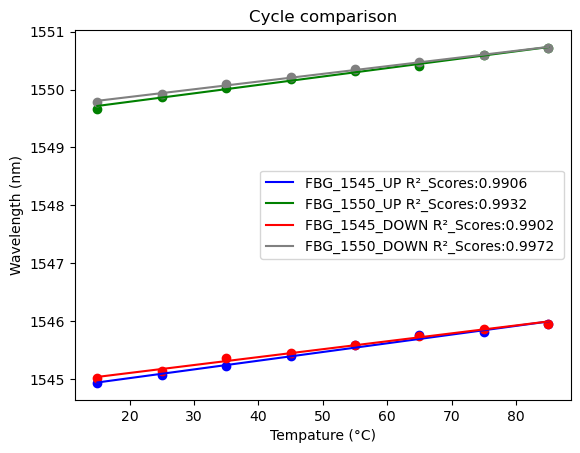

In [57]:
# 3. Linear regression
# Model 1: Temperature Up 1
X1 = temperature_up_1.reshape(-1, 1)
y1 = wavelength_up_1
model1 = LinearRegression()
model1.fit(X1, y1)
predicted1 = model1.predict(X1)

beta_0 = model1.intercept_
beta_1 = model1.coef_[0]
r2_1 = model1.score(X1, y1)
print(f"1: y = {beta_0:.2f} + {beta_1:.6f} * X1, R² = {r2_1:.4f}")

# Model 2: Temperature Up 2
X2 = temperature_up_2.reshape(-1, 1)
y2 = wavelength_up_2
model2 = LinearRegression()
model2.fit(X2, y2)
predicted2 = model2.predict(X2)

beta_2 = model2.intercept_
beta_3 = model2.coef_[0]
r2_2 = model2.score(X2, y2)
print(f"2: y = {beta_2:.2f} + {beta_3:.6f} * X2, R² = {r2_2:.4f}")

# Model 3: Temperature Down 1
X3 = temperature_down_1.reshape(-1, 1)
y3 = wavelength_down_1
model3 = LinearRegression()
model3.fit(X3, y3)
predicted3 = model3.predict(X3)

beta_4 = model3.intercept_
beta_5 = model3.coef_[0]
r2_3 = model3.score(X3, y3)
print(f"3: y = {beta_4:.2f} + {beta_5:.6f} * X3, R² = {r2_3:.4f}")

# Model 4: Temperature Down 2
X4 = temperature_down_2.reshape(-1, 1)
y4 = wavelength_down_2
model4 = LinearRegression()
model4.fit(X4, y4)
predicted4 = model4.predict(X4)

beta_6 = model4.intercept_
beta_7 = model4.coef_[0]
r2_4 = model4.score(X4, y4)
print(f"4: y = {beta_6:.2f} + {beta_7:.6f} * X4, R² = {r2_4:.4f}")

plt.scatter(temperature_up_1, wavelength_up_1, color='blue')
plt.scatter(temperature_up_2, wavelength_up_2, color='green')
plt.scatter(temperature_down_1, wavelength_down_1, color='red')
plt.scatter(temperature_down_2, wavelength_down_2, color='grey')

plt.plot(temperature_up_1, predicted1, color='blue', label=f'FBG_1545_UP R²_Scores:{r2_1:.4f} ')
plt.plot(temperature_up_2, predicted2, color='green', label=f'FBG_1550_UP R²_Scores:{r2_2:.4f} ')
plt.plot(temperature_down_1,predicted3, color='red', label=f'FBG_1545_DOWN R²_Scores:{r2_3:.4f} ')
plt.plot(temperature_down_2, predicted4, color='grey', label=f'FBG_1550_DOWN R²_Scores:{r2_4:.4f} ')

plt.title('Cycle comparison')
plt.xlabel('Tempature (°C)')
plt.ylabel('Wavelength (nm)')

plt.legend()
plt.show()

In [58]:
# 4. Sensitivity calculation
sensitivity1 = delta_lambda_up_1 / delta_temperature_up_1/1545
average_sensitivity1 = np.mean(sensitivity1)
print(f"sentivity1: {average_sensitivity1:.10f} nm/°C")

sensitivity2 = delta_lambda_up_2 / delta_temperature_up_2/1550
average_sensitivity2 = np.mean(sensitivity2)
print(f"sentivity2: {average_sensitivity2:.10f} nm/°C")

sensitivity3 = delta_lambda_down_1 / delta_temperature_down_1/1545
average_sensitivity3 = np.mean(sensitivity3)
print(f"sentivity3: {average_sensitivity3:.10f} nm/°C")

sensitivity4 = delta_lambda_down_2 / delta_temperature_down_2/1550
average_sensitivity4 = np.mean(sensitivity4)
print(f"sentivity4: {average_sensitivity4:.10f} nm/°C")

sentivity1: 0.0000094409 nm/°C
sentivity2: 0.0000096462 nm/°C
sentivity3: 0.0000086656 nm/°C
sentivity4: 0.0000086437 nm/°C


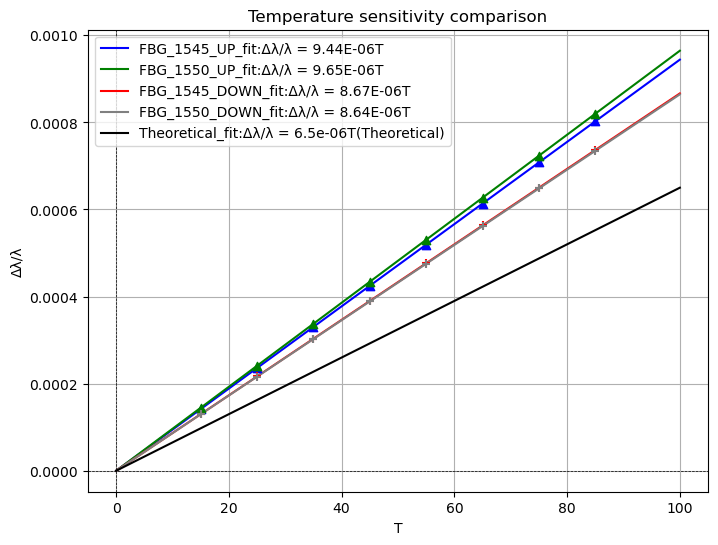

In [61]:
# 5. Generated lines over (0,0)
# Set the existing slope
slope1 = average_sensitivity1  # Replace here with the slope value you already have
slope2 = average_sensitivity2
slope3 = average_sensitivity3
slope4 = average_sensitivity4
slope5 = 0.0000065

# Generate x values
x_slope = np.linspace(0, 100) 

# Calculate the y value
y_slope_1 = slope1 * x_slope  # y = mx (where m is the slope)
y_slope_2 = slope2 * x_slope
y_slope_3 = slope3 * x_slope
y_slope_4 = slope4 * x_slope
y_slope_5 = slope5 * x_slope

# Create graphics
plt.figure(figsize=(8, 6))

# Draw a straight line
plt.plot(x_slope, y_slope_1, label=f'FBG_1545_UP_fit:Δλ/λ = {slope1:.2E}T', color='blue')
plt.plot(x_slope, y_slope_2, label=f'FBG_1550_UP_fit:Δλ/λ = {slope2:.2E}T', color='green')
plt.plot(x_slope, y_slope_3, label=f'FBG_1545_DOWN_fit:Δλ/λ = {slope3:.2E}T', color='red')
plt.plot(x_slope, y_slope_4, label=f'FBG_1550_DOWN_fit:Δλ/λ = {slope4:.2E}T', color='grey')
plt.plot(x_slope, y_slope_5, label=f'Theoretical_fit:Δλ/λ = {slope5:}T(Theoretical)', color='black')


# Draw points
delta_lambda_over_lambda1 = [slope1 * t for t in temperature_up_1]  # 示例计算值
delta_lambda_over_lambda2 = [slope2 * t for t in temperature_up_2]  
delta_lambda_over_lambda3 = [slope3 * t for t in temperature_down_1]  
delta_lambda_over_lambda4 = [slope4 * t for t in temperature_down_2] 

# Add title and tag
plt.title('Temperature sensitivity comparison')
plt.xlabel('T')
plt.ylabel('Δλ/λ')

# Add grid
plt.grid()

plt.scatter(temperature_up_1, delta_lambda_over_lambda1, color='blue',marker='^', zorder=5)
plt.scatter(temperature_up_2, delta_lambda_over_lambda2, color='green',marker='^', zorder=5)
plt.scatter(temperature_down_1, delta_lambda_over_lambda3, color='red',marker='+', zorder=5)
plt.scatter(temperature_down_2, delta_lambda_over_lambda4, color='grey',marker='+', zorder=5)


# Draw horizontal and vertical axes
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')

# Add legend
plt.legend()

# Display graphics
plt.show()